In [1]:
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
import pandas as pd
import numpy as np
import sys
import torch 
sys.path.insert(0,'../src/')
import os
import gc
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "expandable_segments:True"

In [2]:
import datap_efficient_runs as drun
import model_train_benchmark as trb
from labeling_system import *
import cvt_OHE_full_att as cvt
from datap_efficient_bench import *
import model_train_benchmark as trb
from labeling_system import *
import cvt_benchmark_attn as cvtb

In [3]:
# Set up your font properties (optional)
font = fm.FontProperties()
font.set_family('serif')
font.set_name('DejaVu Sans Mono')  # Times font
sns.set(font="DejaVu Sans Mono")

%matplotlib inline 

In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
testo = np.load("../output/testoo.npy", allow_pickle=True)
valido = np.load("../output/validoo.npy", allow_pickle=True)
traino = np.load("../output/trainoo.npy", allow_pickle=True)

In [6]:
bench_test = pd.read_csv('../output/bench_test_bench.csv')
run1_test = pd.read_csv('../output/bench_test_run1.csv')
run2_test = pd.read_csv('../output/bench_test_run2.csv')

In [7]:
bench_test.head()

,Vjerojatnost,Predikcija,Oznaka,ID,Correct
0,0.896750,6,6.0,129469,1
1,0.820891,4,4.0,119388,1
2,0.872357,4,4.0,284459,1
3,0.970880,3,3.0,153665,1
4,0.774043,1,1.0,40401,1


In [8]:
run1_test.head()

,Vjerojatnost,Predikcija,Oznaka,ID,Correct
0,0.867902,2,2.0,129469,1
1,0.989254,1,1.0,119388,1
2,0.988462,1,1.0,284459,1
3,0.944766,1,1.0,153665,1
4,0.971528,0,0.0,40401,1


In [9]:
run2_test.head()

,Vjerojatnost,Predikcija,Oznaka,ID,Correct
0,0.753626,6,6.0,129469,1
1,0.805198,4,4.0,119388,1
2,0.602182,4,4.0,284459,1
3,0.983929,3,3.0,153665,1
4,0.678938,2,1.0,40401,0


In [10]:
run1_test[(run1_test['Correct'] == 1) & (run1_test['Vjerojatnost'] > 0.87)].head(10)

,Vjerojatnost,Predikcija,Oznaka,ID,Correct
1,0.989254,1,1.0,119388,1
2,0.988462,1,1.0,284459,1
3,0.944766,1,1.0,153665,1
4,0.971528,0,0.0,40401,1
5,0.930057,2,2.0,224782,1
7,0.991636,2,2.0,73677,1
8,0.952795,0,0.0,286850,1
11,0.985133,1,1.0,265110,1
13,0.994445,2,2.0,223341,1
14,0.997273,0,0.0,94016,1


RUN 1: show correct: [119388, 40401]

In [11]:
comparison = pd.DataFrame()
comparison['Vjerojatnost 2'] = run2_test['Vjerojatnost']
comparison['Vjerojatnost b'] = bench_test['Vjerojatnost']
comparison['Predikcija 2'] = run2_test['Predikcija']
comparison['Predikcija b'] = bench_test['Predikcija']
comparison['Oznaka 2'] = run2_test['Oznaka']
comparison['Oznaka b'] = bench_test['Oznaka']
comparison['Točno 2'] = run2_test['Correct']
comparison['Točno b'] = bench_test['Correct']
comparison['ID'] = run2_test['ID']
comparison.head()

,Vjerojatnost 2,Vjerojatnost b,Predikcija 2,Predikcija b,Oznaka 2,Oznaka b,Točno 2,Točno b,ID
0,0.753626,0.896750,6,6,6.0,6.0,1,1,129469
1,0.805198,0.820891,4,4,4.0,4.0,1,1,119388
2,0.602182,0.872357,4,4,4.0,4.0,1,1,284459
3,0.983929,0.970880,3,3,3.0,3.0,1,1,153665
4,0.678938,0.774043,2,1,1.0,1.0,0,1,40401


In [12]:
comparison[(comparison['Vjerojatnost 2']>0.87) & (comparison['Vjerojatnost b']>0.87) & (comparison['Točno 2']== 1) & (comparison['Točno b'] == 0)]

,Vjerojatnost 2,Vjerojatnost b,Predikcija 2,Predikcija b,Oznaka 2,Oznaka b,Točno 2,Točno b,ID
233,0.991929,0.933758,0,1,0.0,0.0,1,0,173929
347,0.991870,0.906808,0,1,0.0,0.0,1,0,236519
771,0.870301,0.892833,5,6,5.0,5.0,1,0,128545
1048,0.965737,0.986759,1,0,1.0,1.0,1,0,230020
1068,0.962954,0.953121,0,1,0.0,0.0,1,0,49713
1226,0.964207,0.953631,3,2,3.0,3.0,1,0,255655
1301,0.970808,0.922446,3,0,3.0,3.0,1,0,283289
1808,0.919364,0.911858,0,1,0.0,0.0,1,0,17611
2007,0.885011,0.978742,1,0,1.0,1.0,1,0,173852
2025,0.917597,0.983415,1,0,1.0,1.0,1,0,59441


[128545,283289, 54294]

---

In [13]:
main_runs = pd.read_csv('../input/main_runs.csv')
# ------

soft_label_dict_run1 = create_label_dict1(main_runs)
soft_label_dict_run2 = create_label_dict2(main_runs)

soft_run1_conf, soft_run1_spur = section_spurious(soft_label_dict_run1, num=3)
soft_run2_conf, soft_run2_spur = section_spurious(soft_label_dict_run2, num=7)

hard_run1_conf = create_hard_labels(soft_run1_conf)
hard_run2_conf = create_hard_labels(soft_run2_conf)

imgs_path = '../input/images_gz2/images/'
W, H, C = 224, 224, 4

conf_file_list = create_file_list(imgs_path, soft_run1_conf, soft_run2_conf)

n = 5000
bs = 64
embed_size = 64
device= 'cuda' if torch.cuda.is_available() else 'cpu'

train_dl_run1, valid_dl_run1, test_dl_run1, train_coarse1, valid_coarse1, test_coarse1 = drun.create_dali_iterators(traino, valido, testo, hard_run1_conf, bs)
train_dl_run2, valid_dl_run2, test_dl_run2, train_coarse2, valid_coarse2, test_coarse2 = drun.create_dali_iterators(traino, valido, testo, hard_run2_conf, bs, previous=train_coarse1)
train_iter, valid_iter, test_iter = create_dali_iterators(traino, valido, testo, hard_run2_conf, bs)

Creating file lists with 23450 training, 6632 validation, and 3418 test files
Creating DALI file list with 23450 files
First few files: ['../input/images_gz2/images/46448.jpg'
 '../input/images_gz2/images/252421.jpg'
 '../input/images_gz2/images/35211.jpg'
 '../input/images_gz2/images/164339.jpg'
 '../input/images_gz2/images/155428.jpg']
Creating DALI file list with 6632 files
First few files: ['../input/images_gz2/images/3723.jpg'
 '../input/images_gz2/images/169248.jpg'
 '../input/images_gz2/images/16598.jpg'
 '../input/images_gz2/images/123968.jpg'
 '../input/images_gz2/images/87375.jpg']
Creating DALI file list with 3418 files
First few files: ['../input/images_gz2/images/129469.jpg'
 '../input/images_gz2/images/119388.jpg'
 '../input/images_gz2/images/284459.jpg'
 '../input/images_gz2/images/153665.jpg'
 '../input/images_gz2/images/40401.jpg']


In [14]:
torch.cuda.empty_cache()
gc.collect()
del train_dl_run1, valid_dl_run1, train_dl_run2, valid_dl_run2, train_iter, valid_iter

In [15]:
model_path = '../output/run1_02/model_RUN_01_full_final_02_epoch32.pth'
gmorph_model1 = cvt.CvT_cyclic(embed_size, 3, hint=False)
state_dict = torch.load(model_path)      

# Convert all parameters to half precision and move to device
for key in state_dict:
    if state_dict[key].dtype == torch.float32:
        state_dict[key] = state_dict[key].half()
    state_dict[key] = state_dict[key].to(device)
        
gmorph_model1.load_state_dict(state_dict)         
gmorph_model1 = gmorph_model1.half().to(device)  # Ensure model is in half precision and on device

In [16]:
model_path = '../output/run2_02/model_RUN_02_full_final_02_epoch32.pth'
gmorph_model2 = cvt.CvT_cyclic(embed_size, 7, hint=True)
state_dict = torch.load(model_path)      

# Convert all parameters to half precision and move to device
for key in state_dict:
    if state_dict[key].dtype == torch.float32:
        state_dict[key] = state_dict[key].half()
    state_dict[key] = state_dict[key].to(device)
        
gmorph_model2.load_state_dict(state_dict)         
gmorph_model2 = gmorph_model2.half().to(device)  # Ensure model is in half precision and on device

In [17]:
model_path = '../output/benchmark/model_benchmark_test_maps_02_epoch32.pth'
gmorph_model = cvtb.CvT_bench(embed_size, 7)
state_dict = torch.load(model_path)      

# Convert all parameters to half precision and move to device
for key in state_dict:
    if state_dict[key].dtype == torch.float32:
        state_dict[key] = state_dict[key].half()
    state_dict[key] = state_dict[key].to(device)
        
gmorph_model.load_state_dict(state_dict)         
gmorph_model = gmorph_model.half().to(device)  # Ensure model is in half precision and on device

In [21]:
cvtb.cvt_attention_map(gmorph_model1, test_dl_run1, device='cuda', gxy_labels=['E', 'S', 'Se'], dest_dir='../images/', sel_gal_ids=[119388, 40401])
torch.cuda.empty_cache()
gc.collect()

Starting attention map visualization for 2 galaxies
Destination directory: ../images/
Processing batch with galaxy IDs: tensor([246505, 251748,  74729,  61369,  41379, 262975,  41172, 267277, 264376,
        210204, 138522,  87699, 259509,  77039, 254317,  51413, 160846,  97897,
        115873, 168754, 251082,  16379,  22712, 271658,  36024, 215563, 269177,
         75135,  15642,  80962,  34872,  21096, 141995,  67305,  84178,  28034,
        294742,   8449, 208110, 210830, 223682,  87330, 116041, 264888,  62916,
        157484,  46670,  51946, 187944, 282419, 127495, 165998,  62571, 246527,
         58211, 267416, 170309, 258153, 106261, 252997, 195528, 216339, 243902,
        220601], dtype=torch.int32)
Processing galaxy ID: 246505
Skipping galaxy 246505 - not in selected list
Processing galaxy ID: 251748
Skipping galaxy 251748 - not in selected list
Processing galaxy ID: 74729
Skipping galaxy 74729 - not in selected list
Processing galaxy ID: 61369
Skipping galaxy 61369 - not in se

Processing galaxy ID: 27217
Skipping galaxy 27217 - not in selected list
Processing galaxy ID: 251397
Skipping galaxy 251397 - not in selected list
Processing galaxy ID: 167810
Skipping galaxy 167810 - not in selected list
Processing galaxy ID: 173848
Skipping galaxy 173848 - not in selected list
Processing galaxy ID: 225057
Skipping galaxy 225057 - not in selected list
Processing galaxy ID: 24689
Skipping galaxy 24689 - not in selected list
Processing galaxy ID: 143146
Skipping galaxy 143146 - not in selected list
Processing galaxy ID: 67238
Skipping galaxy 67238 - not in selected list
Processing galaxy ID: 242058
Skipping galaxy 242058 - not in selected list
Processing galaxy ID: 58266
Skipping galaxy 58266 - not in selected list
Processing galaxy ID: 73061
Skipping galaxy 73061 - not in selected list
Processing galaxy ID: 223923
Skipping galaxy 223923 - not in selected list
Processing galaxy ID: 53351
Skipping galaxy 53351 - not in selected list
Processing galaxy ID: 231004
Skipping

96455

In [24]:
cvtb.cvt_attention_map(gmorph_model, test_iter, device='cuda', gxy_labels=['Er', 'Ei', 'Ec', 'S', 'SB', 'Seb', 'Sen'], dest_dir='../images/', sel_gal_ids=[128545,283289, 54294])
torch.cuda.empty_cache()
gc.collect()

Starting attention map visualization for 3 galaxies
Destination directory: ../images/
Processing batch with galaxy IDs: tensor([246505, 251748,  74729,  61369,  41379, 262975,  41172, 267277, 264376,
        210204, 138522,  87699, 259509,  77039, 254317,  51413, 160846,  97897,
        115873, 168754, 251082,  16379,  22712, 271658,  36024, 215563, 269177,
         75135,  15642,  80962,  34872,  21096, 141995,  67305,  84178,  28034,
        294742,   8449, 208110, 210830, 223682,  87330, 116041, 264888,  62916,
        157484,  46670,  51946, 187944, 282419, 127495, 165998,  62571, 246527,
         58211, 267416, 170309, 258153, 106261, 252997, 195528, 216339, 243902,
        220601], dtype=torch.int32)
Processing galaxy ID: 246505
Skipping galaxy 246505 - not in selected list
Processing galaxy ID: 251748
Skipping galaxy 251748 - not in selected list
Processing galaxy ID: 74729
Skipping galaxy 74729 - not in selected list
Processing galaxy ID: 61369
Skipping galaxy 61369 - not in se

Processing galaxy ID: 27217
Skipping galaxy 27217 - not in selected list
Processing galaxy ID: 251397
Skipping galaxy 251397 - not in selected list
Processing galaxy ID: 167810
Skipping galaxy 167810 - not in selected list
Processing galaxy ID: 173848
Skipping galaxy 173848 - not in selected list
Processing galaxy ID: 225057
Skipping galaxy 225057 - not in selected list
Processing galaxy ID: 24689
Skipping galaxy 24689 - not in selected list
Processing galaxy ID: 143146
Skipping galaxy 143146 - not in selected list
Processing galaxy ID: 67238
Skipping galaxy 67238 - not in selected list
Processing galaxy ID: 242058
Skipping galaxy 242058 - not in selected list
Processing galaxy ID: 58266
Skipping galaxy 58266 - not in selected list
Processing galaxy ID: 73061
Skipping galaxy 73061 - not in selected list
Processing galaxy ID: 223923
Skipping galaxy 223923 - not in selected list
Processing galaxy ID: 53351
Skipping galaxy 53351 - not in selected list
Processing galaxy ID: 231004
Skipping

255

In [29]:
cvtb.cvt_attention_map(gmorph_model2, test_dl_run2, device='cuda', gxy_labels=['Er', 'Ei', 'Ec', 'S', 'SB', 'Seb', 'Sen'], dest_dir='../nbs/', sel_gal_ids=[128545,283289, 54294])
torch.cuda.empty_cache()
gc.collect()

Starting attention map visualization for 3 galaxies
Destination directory: ../nbs/
Processing batch with galaxy IDs: tensor([259509,  77039, 254317,  51413, 160846,  97897, 115873, 168754, 251082,
         16379,  22712, 271658,  36024, 215563, 269177,  75135,  15642,  80962,
         34872,  21096, 141995,  67305,  84178,  28034, 294742,   8449, 208110,
        210830, 223682,  87330, 116041, 264888,  62916, 157484,  46670,  51946,
        187944, 282419, 127495, 165998,  62571, 246527,  58211, 267416, 170309,
        258153, 106261, 252997, 195528, 216339, 243902, 220601,  27217, 251397,
        167810, 173848, 225057,  24689, 143146,  67238, 242058,  58266,  73061,
        223923], dtype=torch.int32)
Processing galaxy ID: 259509
Skipping galaxy 259509 - not in selected list
Processing galaxy ID: 77039
Skipping galaxy 77039 - not in selected list
Processing galaxy ID: 254317
Skipping galaxy 254317 - not in selected list
Processing galaxy ID: 51413
Skipping galaxy 51413 - not in selec

230

In [30]:
torch.cuda.empty_cache()
gc.collect()

96240

---

In [31]:
comparison

,Vjerojatnost 2,Vjerojatnost b,Predikcija 2,Predikcija b,Oznaka 2,Oznaka b,Točno 2,Točno b,ID
0,0.753626,0.896750,6,6,6.0,6.0,1,1,129469
1,0.805198,0.820891,4,4,4.0,4.0,1,1,119388
2,0.602182,0.872357,4,4,4.0,4.0,1,1,284459
3,0.983929,0.970880,3,3,3.0,3.0,1,1,153665
4,0.678938,0.774043,2,1,1.0,1.0,0,1,40401
...,...,...,...,...,...,...,...,...,...
3451,0.979777,0.969446,1,1,1.0,1.0,1,1,187432
3452,0.660026,0.958457,3,4,4.0,4.0,0,1,178964
3453,0.577866,0.887103,5,2,2.0,2.0,0,1,108822
3454,0.922186,0.814565,5,5,5.0,5.0,1,1,57570


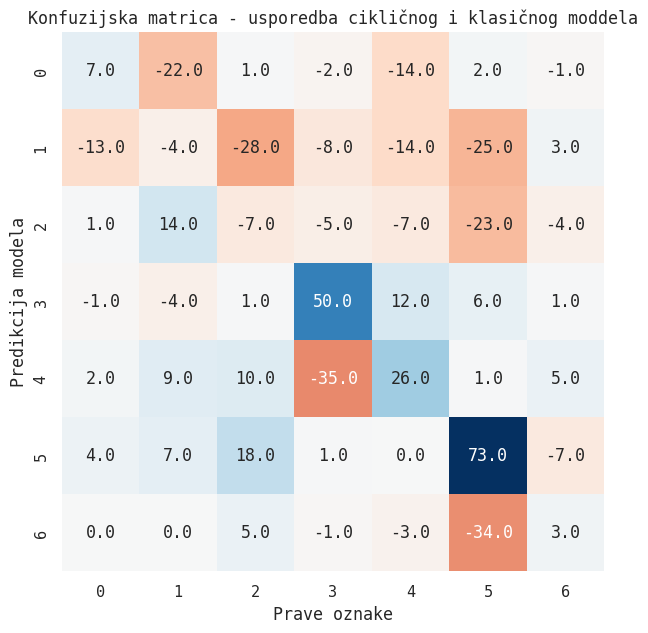

In [39]:
ct2 = pd.crosstab(comparison['Predikcija 2'],  comparison['Oznaka 2'], rownames=["Predikcija modela"], colnames=["Prave oznake"])
ct_b = pd.crosstab(comparison['Predikcija b'],  comparison['Oznaka b'], rownames=["Predikcija modela"], colnames=["Prave oznake"])
ct = ct2 - ct_b

abs_val = np.max(np.abs(ct.values))

plt.figure(figsize=(7,7))
sns.heatmap(
    ct, 
    cmap="RdBu",      # A diverging colormap (red for negative, blue for positive)
    annot=True, 
    xticklabels="0123456", 
    yticklabels="0123456", 
    fmt=".1f", 
    cbar=False,
    center=0,          # Force color scale to center at 0
    vmin=-abs_val,     # Ensure symmetrical range for negative/positive
    vmax=abs_val
)
plt.title("Konfuzijska matrica - usporedba cikličnog i klasičnog moddela",fontproperties=font, fontsize=12)
plt.savefig('../images/confusion_matrix_difference.png',dpi=300, bbox_inches = 'tight')

plt.show()